In [661]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [662]:
df=pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [663]:
#separate cols
numerical_cols=['Time_spent_Alone', "Social_event_attendance", "Going_outside", "Friends_circle_size", "Post_frequency"]

categorical_cols=["Stage_fear", "Drained_after_socializing"]
target_col="Personality"

In [664]:
#basic info
print("Data shape:", df.shape)
print(df.info())

Data shape: (2900, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None


In [665]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [666]:
for col in categorical_cols:
  print(f"Unique Values in {col}:")
  print(df[col].value_counts(dropna=False))

Unique Values in Stage_fear:
Stage_fear
No     1417
Yes    1410
NaN      73
Name: count, dtype: int64
Unique Values in Drained_after_socializing:
Drained_after_socializing
No     1441
Yes    1407
NaN      52
Name: count, dtype: int64


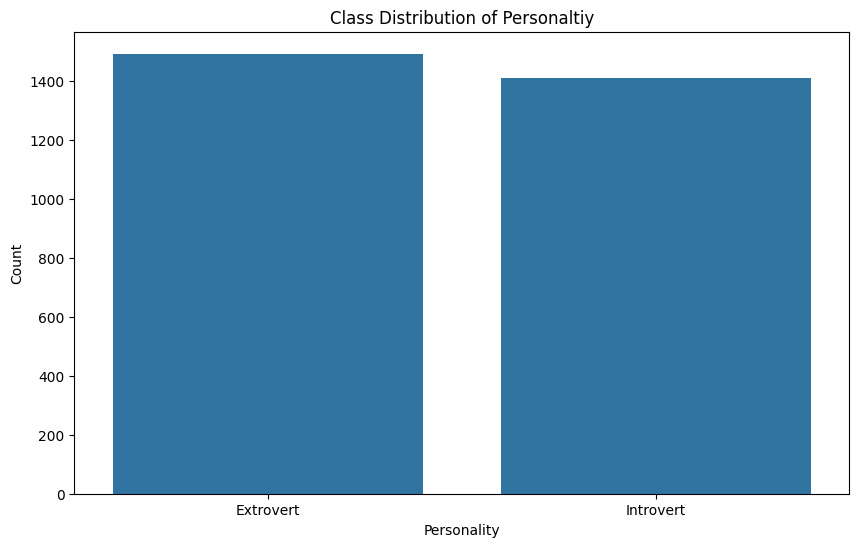

In [667]:
plt.figure(figsize=(10,6))
sns.countplot(x=target_col,data=df)
plt.title("Class Distribution of Personaltiy")
plt.xlabel("Personality")
plt.ylabel("Count")
plt.show()

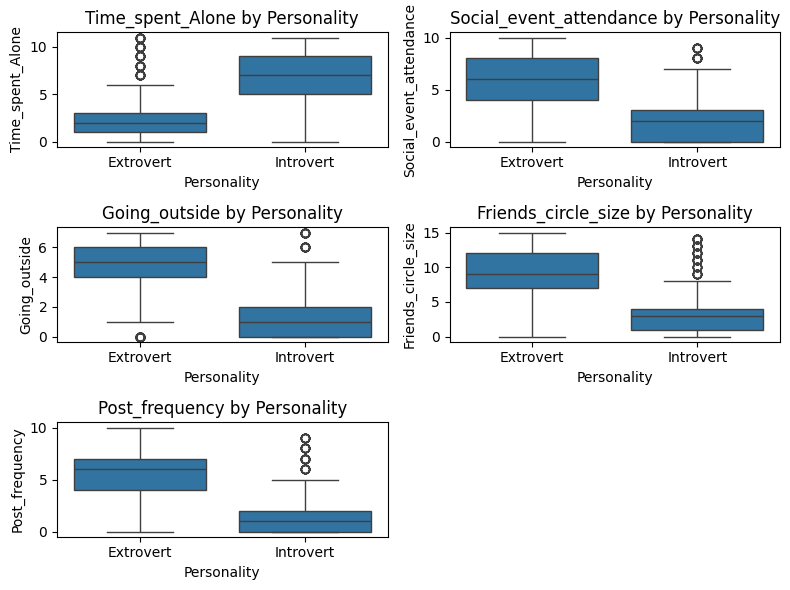

In [668]:
plt.figure(figsize=(8,6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f"{col} by Personality")

plt.tight_layout()
plt.show()

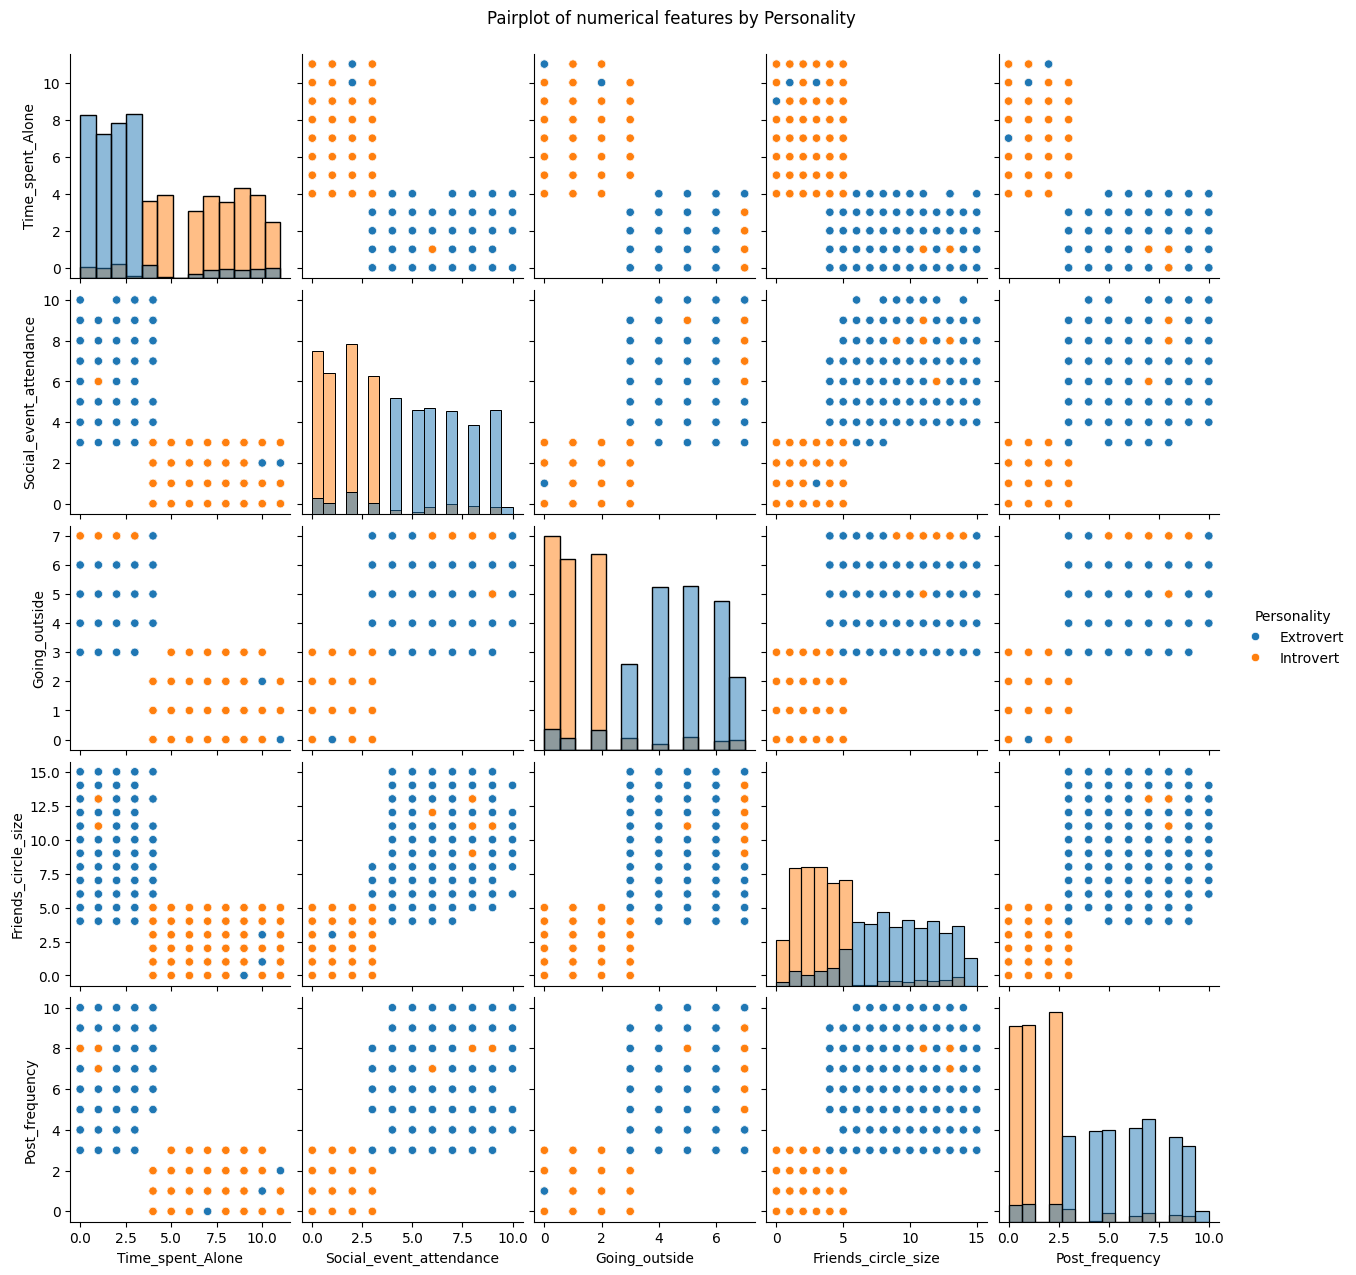

In [669]:
sns.pairplot(df[numerical_cols + [target_col]], hue=target_col, diag_kind="hist")
plt.suptitle("Pairplot of numerical features by Personality", y=1.02)
plt.show()

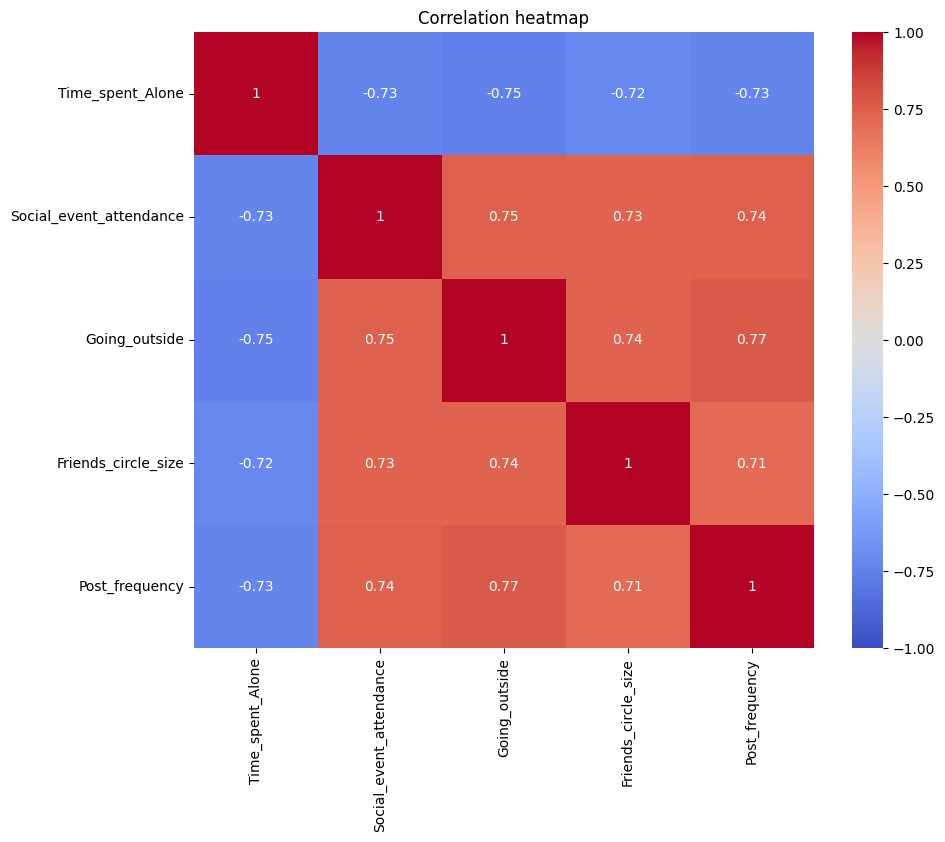

In [670]:
#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation heatmap")
plt.show()

Data Processing

In [671]:
#Encoding
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [672]:
df[target_col] = le.fit_transform(df[target_col])

In [673]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [674]:
# Handling NaNs of numerical_cols
num_imputer = SimpleImputer(strategy="mean")
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Handling NaNs for cat cols
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   int64  
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   int64  
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 181.4 KB


In [676]:
X=numerical_cols + categorical_cols
print(X)

['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency', 'Stage_fear', 'Drained_after_socializing']


In [677]:
df[X].head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing
0,4.0,4.0,6.0,13.0,5.0,0,0
1,9.0,0.0,0.0,0.0,3.0,1,1
2,9.0,1.0,2.0,5.0,2.0,1,1
3,0.0,6.0,7.0,14.0,8.0,0,0
4,3.0,9.0,4.0,8.0,5.0,0,0


In [678]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[target_col], test_size=0.25, random_state=40)

Model Training

In [679]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, random_state=42)

In [680]:
#prediction
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9462068965517242
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       359
           1       0.94      0.96      0.95       366

    accuracy                           0.95       725
   macro avg       0.95      0.95      0.95       725
weighted avg       0.95      0.95      0.95       725



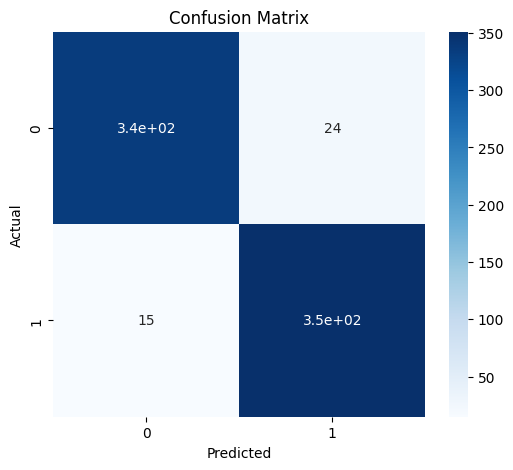

In [681]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)